In [1]:
#!/usr/bin/env python3

import os
import sys
import yaml
import numpy as np
print("当前工作目录:", os.getcwd())
print("pardir",os.pardir)
par_dir = os.pardir
sys.path.append(par_dir)

from src.map import Map



def load_config(config_path):
    """加载配置文件"""
    with open(config_path, 'r') as file:
        config = yaml.load(file, Loader=yaml.FullLoader)
    return config

def simulate_robot_sensing(map_obj, robot_pos, sense_range):
    """模拟机器人的激光传感器感知"""
    senses = []
    x, y = robot_pos
    
    # 简单模拟：感知范围内的所有单元格
    for dx in range(-sense_range, sense_range + 1):
        for dy in range(-sense_range, sense_range + 1):
            nx, ny = x + dx, y + dy
            # 检查坐标是否在地图范围内
            if 0 <= nx < map_obj.width and 0 <= ny < map_obj.height:
                # 计算到机器人的距离
                distance = np.sqrt(dx**2 + dy**2)
                if distance <= sense_range:
                    senses.append((nx, ny))
    
    return senses



当前工作目录: d:\berker\graduation_design\code\POMAPD\tests_nb
pardir ..


成功加载配置文件: ..\config\environments\input_mid_poisson.yaml
地图大小: (36, 20)
任务数量: 100
机器人数量: 20
创建真实地图完成
创建机器人视角下的地图完成
机器人初始位置: (30, 4)
机器人感知到 80 个单元格
[Map] 更新占用地图完成，耗时: 0.0s.
[Map] 生成了新的中心点！
[Map] 找到前沿点并聚类完成，耗时: 0.26761s.
已知区域比例: 11.11%
前沿点数量: 17
中心点数量: 3
已发现任务数量: 10

显示真实地图...


d:\berker\graduation_design\code\POMAPD\tests_nb\..\src\map.py:537: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((x - 0.5, y - 0.5), 1, 1, color='white',
d:\berker\graduation_design\code\POMAPD\tests_nb\..\src\map.py:630: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_elements.append(patches.Patch(color='white', edgecolor='lightgray', label='自由空间'))


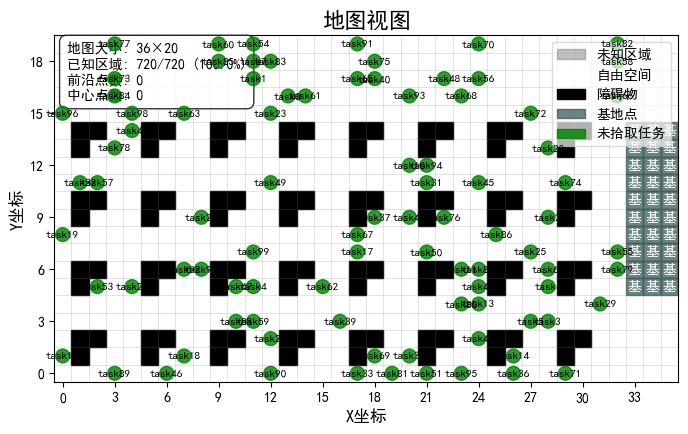


显示机器人视角地图...


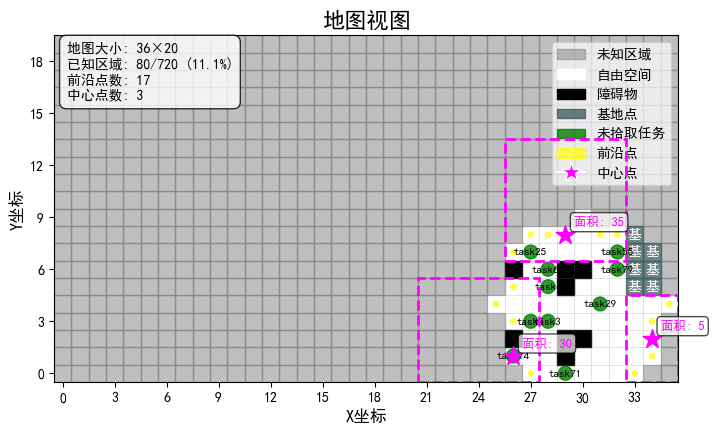


模拟机器人移动...
机器人新位置: (33, 6)
机器人在新位置感知到 64 个单元格
[Map] 更新占用地图完成，耗时: 0.001s.
[Map] 生成了新的中心点！
[Map] 找到前沿点并聚类完成，耗时: 0.06052s.
更新后已知区域比例: 13.89%
更新后前沿点数量: 13
更新后中心点数量: 4
更新后已发现任务数量: 10

显示更新后的机器人视角地图...


d:\berker\graduation_design\code\POMAPD\tests_nb\..\src\map.py:537: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((x - 0.5, y - 0.5), 1, 1, color='white',
d:\berker\graduation_design\code\POMAPD\tests_nb\..\src\map.py:630: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_elements.append(patches.Patch(color='white', edgecolor='lightgray', label='自由空间'))


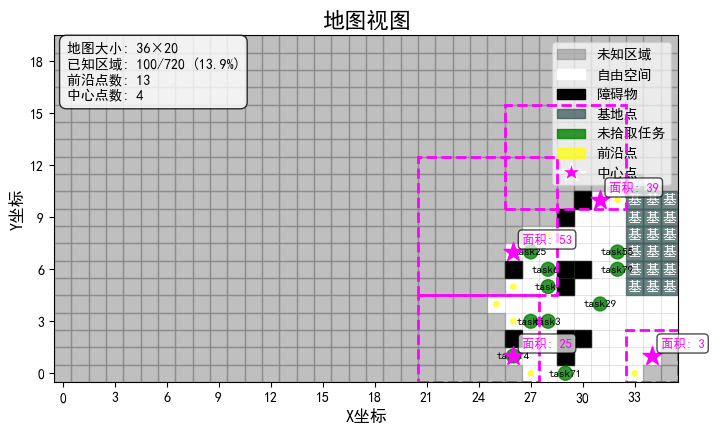


测试完成!


In [2]:
def main():
    # 配置文件路径
    config_path = os.path.join('..', 'config', 'environments', 'input_mid_poisson.yaml')
    
    # 加载配置
    config = load_config(config_path)
    print(f"成功加载配置文件: {config_path}")
    
    # 提取地图信息
    map_info = config['map']
    tasks = config['tasks']
    agents = config['agents']
    
    # 为任务添加类型和状态字段
    for task in tasks:
        task['type'] = 'task'
        task['picked'] = False
    
    # 设置激光传感器范围
    laser_range = 5
    
    print(f"地图大小: {map_info['dimensions']}")
    print(f"任务数量: {len(tasks)}")
    print(f"机器人数量: {len(agents)}")
    
    # 创建真实地图（完全可见）
    real_map = Map(map_info, tasks, laser_range, screen=True)
    print("创建真实地图完成")
    
    # 创建机器人视角下的地图（初始全未知）
    robot_map = real_map.back_to_unknown()
    print("创建机器人视角下的地图完成")
    
    # 模拟机器人的初始感知，使用第一个机器人的位置
    robot_pos = agents[0]['start']
    print(f"机器人初始位置: {robot_pos}")
    
    # 获取机器人感知到的区域
    senses = simulate_robot_sensing(real_map, robot_pos, laser_range)
    print(f"机器人感知到 {len(senses)} 个单元格")
    
    # 更新机器人地图
    robot_map.update(real_map, senses)
    print(f"已知区域比例: {robot_map.known_area/robot_map.total_area*100:.2f}%")
    print(f"前沿点数量: {len(robot_map.frontiers)}")
    print(f"中心点数量: {len(robot_map.centroids)}")
    print(f"已发现任务数量: {len(robot_map.tasks_seen)}")
    
    # 可视化真实地图和机器人地图
    print("\n显示真实地图...")
    real_map.show2(show_frontiers=False, show_centroids=False)
    
    print("\n显示机器人视角地图...")
    robot_map.show2(show_frontiers=True, show_centroids=True)
    
    # 测试移动并更新地图
    print("\n模拟机器人移动...")
    # 移动到另一个位置
    new_robot_pos = (robot_pos[0] + 3, robot_pos[1] + 2)
    print(f"机器人新位置: {new_robot_pos}")
    
    # 获取新位置的感知
    new_senses = simulate_robot_sensing(real_map, new_robot_pos, laser_range)
    print(f"机器人在新位置感知到 {len(new_senses)} 个单元格")
    
    # 更新地图
    robot_map.update(real_map, new_senses)
    print(f"更新后已知区域比例: {robot_map.known_area/robot_map.total_area*100:.2f}%")
    print(f"更新后前沿点数量: {len(robot_map.frontiers)}")
    print(f"更新后中心点数量: {len(robot_map.centroids)}")
    print(f"更新后已发现任务数量: {len(robot_map.tasks_seen)}")
    
    # 显示更新后的地图
    print("\n显示更新后的机器人视角地图...")
    robot_map.show2(show_frontiers=True, show_centroids=True)
    
    print("\n测试完成!")

if __name__ == "__main__":
    main()